## Trabalho 1 - Métodos matemáticos para análise de dados

Giovana Silverio Pereira - 2024000681 \
Laviny Rodrigues Laurindo - 2023012893



Os seguintes códigos foram realizados para o primeiro trabalho da disciplina de métodos matemáticos para análise de dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## Tabulação

In [2]:
df = pd.read_csv('salaries.csv')
df

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)
...,...,...,...,...,...,...
865,RXO,NaN,"Software Engineer, Machine Learning Compute","San Francisco, CA",6d,NaN
866,Infosys,NaN,Software Engineer - 3 (Apache NiFi),"Annapolis Junction, MD",18d,NaN
867,Medtronic,NaN,Senior Software Engineer,"Southfield, MI",19d,NaN
868,NaN,NaN,Junior Python Developer,"Charlotte, NC",2d,NaN


In [3]:
df.rename(columns={'Company': 'Empresa', 'Company Score': 'Avaliação da Empresa', 'Job Title': 'Cargo', 'Location': 'Localização', 'Date': 'Data', 'Salary': 'Salario'}, inplace=True)
df.head()

,Empresa,Avaliação da Empresa,Cargo,Localização,Data,Salario
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)


## Limpeza de dados

In [4]:
df = df.dropna()
# Remover linhas com valores nulos

In [5]:
df = df.drop_duplicates()
# Remover valores duplicados

In [6]:
df['Salario'] = df['Salario'].str.replace(r'\s*\(.*?\)', '', regex=True)
#Remover caracteres especiais do salário

In [7]:
df.to_csv('arquivo_limpo.csv', index=False)
# Salvar o arquivo limpo em outro csv

In [8]:
df = pd.read_csv('arquivo_limpo.csv')
df
# Ler o arquivo limpo

,Empresa,Avaliação da Empresa,Cargo,Localização,Data,Salario
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K
...,...,...,...,...,...,...
748,OpenAI,3.1,Apprentice ETL Software Engineer,"Elkridge, MD",30d+,$160K - $385K
749,NCR Atleos,3.9,"Software Engineer, Tool & Infrastructure, Reli...","Palo Alto, CA",1d,$222K
750,Electronic Warfare Associates,3.8,"Software Engineer, Engineering Acceleration","San Francisco, CA",5d,$82K - $118K
751,"BillGO, Inc.",3.3,ATM Software Engineer (Level III),"Frisco, TX",30d+,$69K - $107K


## Análise dos dados

In [9]:
# Função para limpar e converter a faixa salarial para valores numéricos (média entre mínimo e máximo)
def clean_salary(salary_range):
    # Remover caracteres especiais e tentar extrair os números
    salary_numbers = re.findall(r'\d+', salary_range)
    if len(salary_numbers) == 2:  # Se houver um mínimo e um máximo
        salary_min = int(salary_numbers[0])
        salary_max = int(salary_numbers[1])
        return (salary_max + salary_min) / 2 # Retorna a média da faixa salarial
    elif len(salary_numbers) == 1:  # Se houver apenas um valor
        return int(salary_numbers[0])
    else:
        return None # Se não houver valores numéricos, retorna None
    
df['Salario Limpo'] = df['Salario'].apply(clean_salary)
df = df.dropna(subset=['Salario Limpo'])


In [10]:

# Separar a coluna 'Localização' em duas colunas: 'Cidade' e 'Estado'
df[['Cidade', 'Estado']] = df['Localização'].str.split(',', expand=True)

# Remover espaços extras em 'Estado'
df['Estado'] = df['Estado'].str.strip()

# Contar a frequência de cada estado
frequencia_estados = df['Estado'].value_counts(normalize=True)

# Filtrar os estados que têm uma representatividade maior ou igual a 1%
estados_acima_1 = frequencia_estados[frequencia_estados >= 0.01].index

# Manter apenas os registros com estados que têm 1% ou mais de representatividade
df_filtrado = df[df['Estado'].isin(estados_acima_1)]

# Agrupar as cidades pelo estado
cidades_por_estado = df_filtrado.groupby('Estado')['Cidade'].apply(list).reset_index()

# Exibir as cidades agrupadas por estado
print(cidades_por_estado)


   Estado                                             Cidade
0      AZ  [Phoenix, Phoenix, Scottsdale, Phoenix, Phoeni...
1      CA  [Los Angeles, San Francisco, Los Angeles, San ...
2      CO  [Denver, Fort Collins, Fort Collins, Aurora, G...
3      CT  [Waterford, Avon, Avon, Cheshire, Hartford, Ha...
4      DC  [Washington, Washington, Washington, Washingto...
5      FL  [Plantation, Sunrise, Kennedy Sp Ct, Jacksonvi...
6      GA  [Alpharetta, Atlanta, Atlanta, Alpharetta, Atl...
7      IL  [Chicago, Chicago, Chicago, Deerfield, Chicago...
8      MA  [Boston, Boston, Northborough, Springfield, Be...
9      MD  [Annapolis Junction, Annapolis Junction, Fort ...
10     MI  [Farmington Hills, Troy, Canton, Jackson, Cant...
11     MN  [Saint Paul, Maplewood, Hopkins, Minneapolis, ...
12     NC  [Cary, Morrisville, Greensboro, Charlotte, Ral...
13     NJ  [Whitehouse Station, Egg Harbor Township, Sayr...
14     NY  [New York, Melville, New York, New York, New Y...
15     OH  [Dayton, Dubl

C:\Users\Giovani\AppData\Local\Temp\ipykernel_15276\2902102615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Cidade', 'Estado']] = df['Localização'].str.split(',', expand=True)
C:\Users\Giovani\AppData\Local\Temp\ipykernel_15276\2902102615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Cidade', 'Estado']] = df['Localização'].str.split(',', expand=True)
C:\Users\Giovani\AppData\Local\Temp\ipykernel_15276\2902102615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

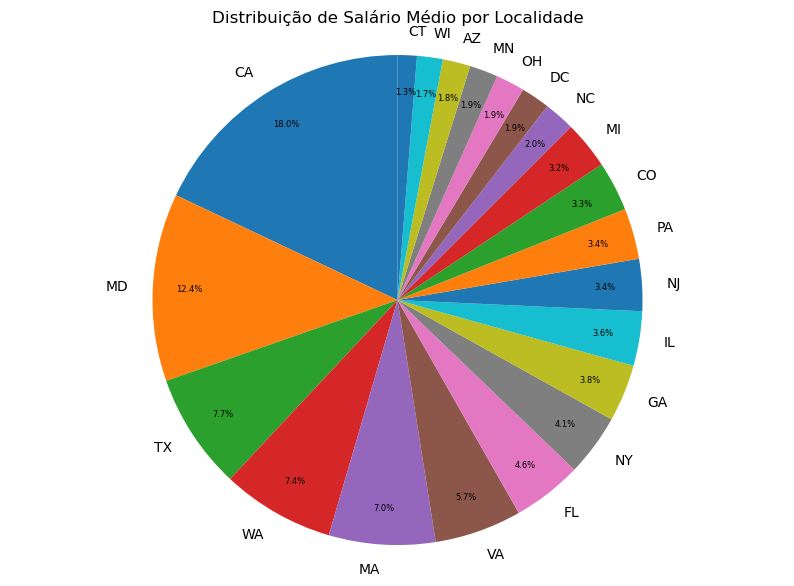

In [11]:
salary_by_local= df_filtrado.groupby('Estado')['Salario Limpo'].sum().sort_values(ascending=False)

# Criar o gráfico de pizza
plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(salary_by_local, labels=salary_by_local.index, autopct='%1.1f%%', startangle=90, labeldistance=1.1, pctdistance=0.85)
# Ajustar o tamanho das porcentagens e labels para evitar sobreposição
for autotext in autotexts:
    autotext.set_size(6)  # Tamanho das porcentagens

for text in texts:
    text.set_size(10)
plt.title('Distribuição de Salário Médio por Localidade')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


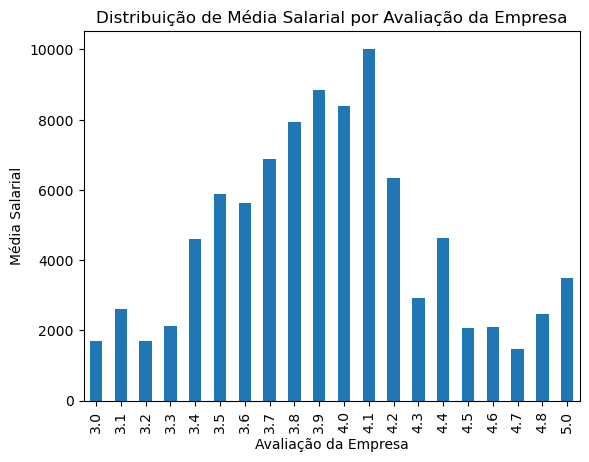

In [12]:
# Contar a frequência de cada estado
frequencia_avaliacao = df['Avaliação da Empresa'].value_counts(normalize=True)

# Filtrar os estados que têm uma representatividade maior ou igual a 1%
avaliacao_acima_1 = frequencia_avaliacao[frequencia_avaliacao >= 0.01].index

# Manter apenas os registros com estados que têm 1% ou mais de representatividade
df_filtrado = df[df['Avaliação da Empresa'].isin(avaliacao_acima_1)]

# Agrupar por cargo e calcular a média salarial
salary_by_rate = df_filtrado.groupby('Avaliação da Empresa')['Salario Limpo'].sum().sort_values(ascending=False)

#Ordenar os índices em ordem crescente 
salary_by_rate = salary_by_rate.sort_index(ascending=True)
salary_by_rate.plot(kind='bar', stacked=False)
plt.title('Distribuição de Média Salarial por Avaliação da Empresa')
plt.ylabel('Média Salarial')
plt.xlabel('Avaliação da Empresa')

# Mostrar o gráfico
plt.show()


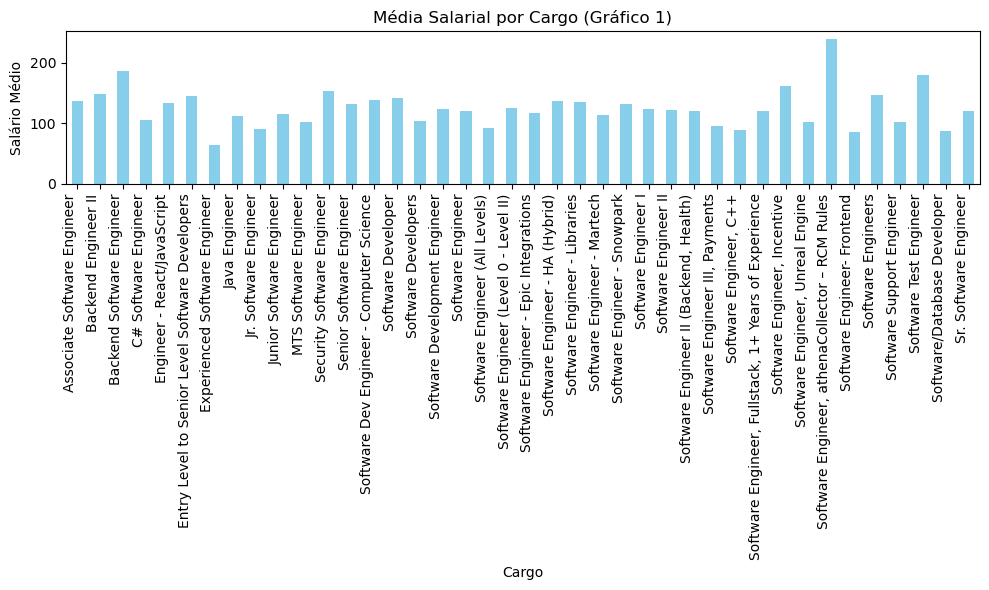

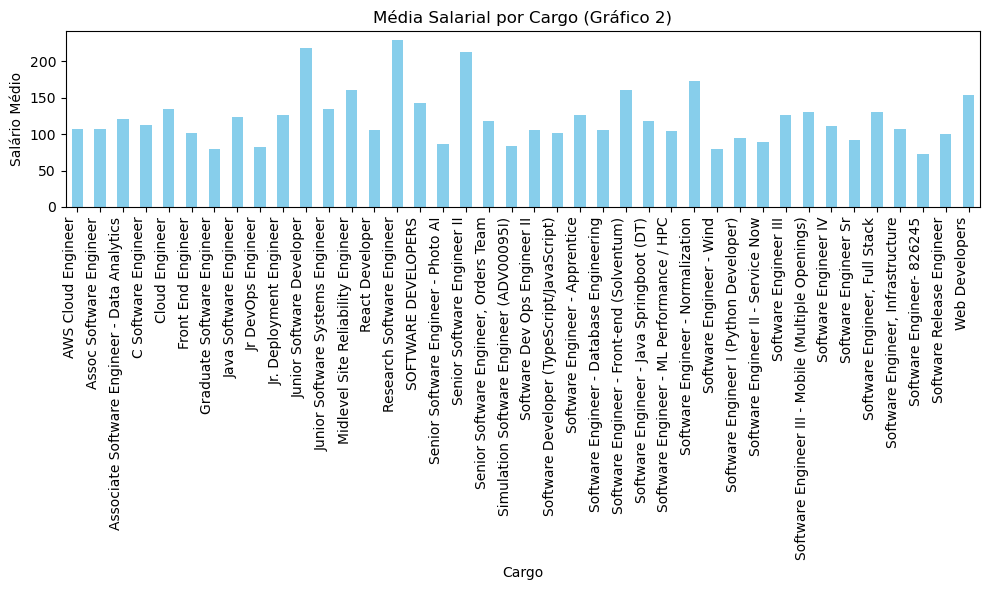

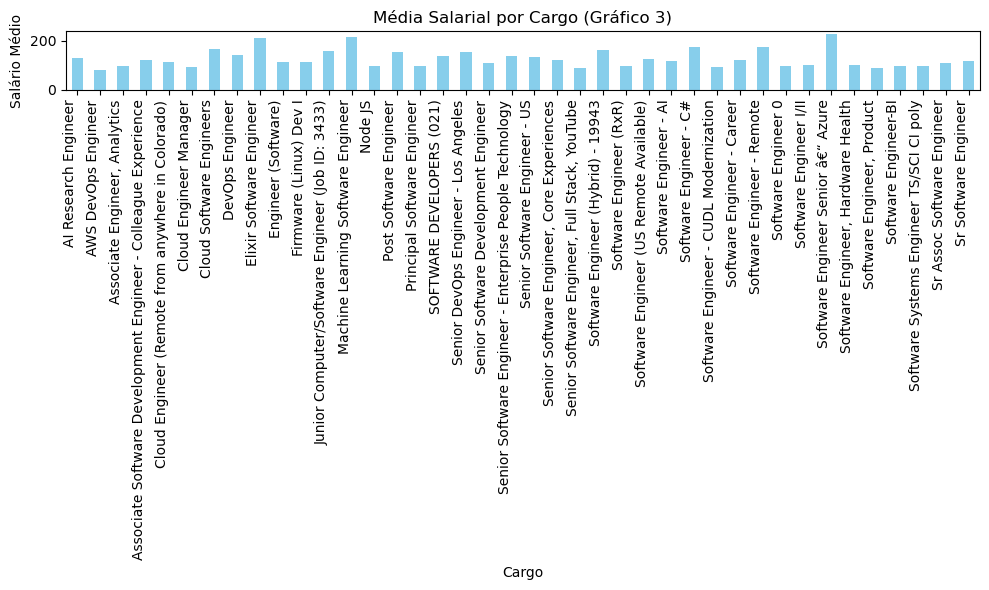

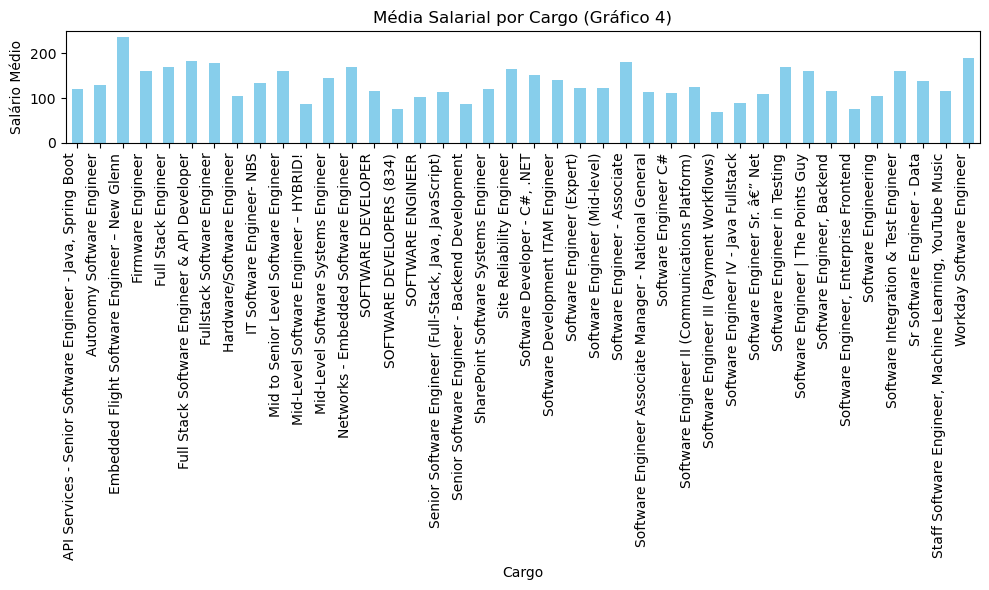

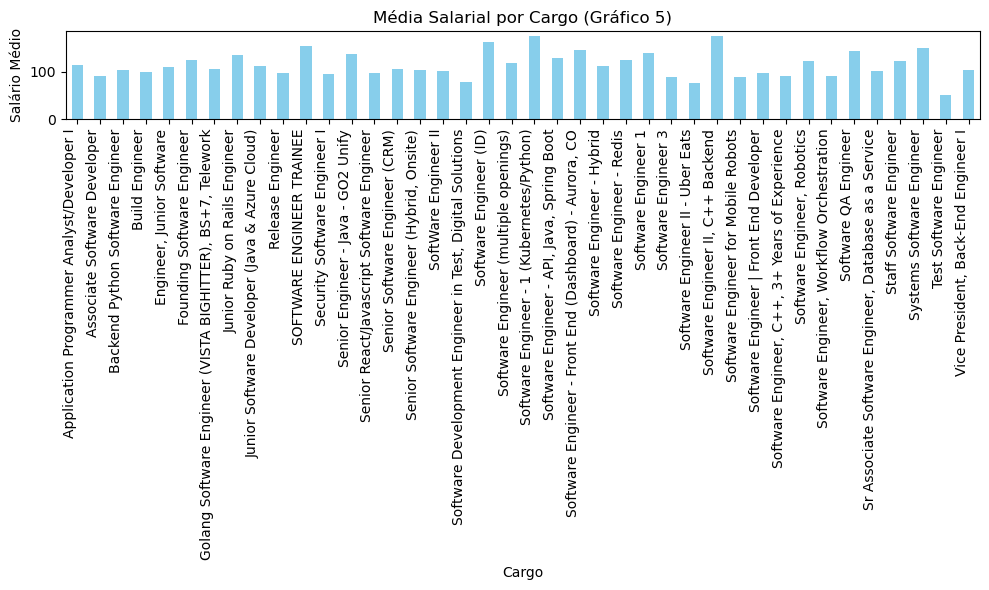

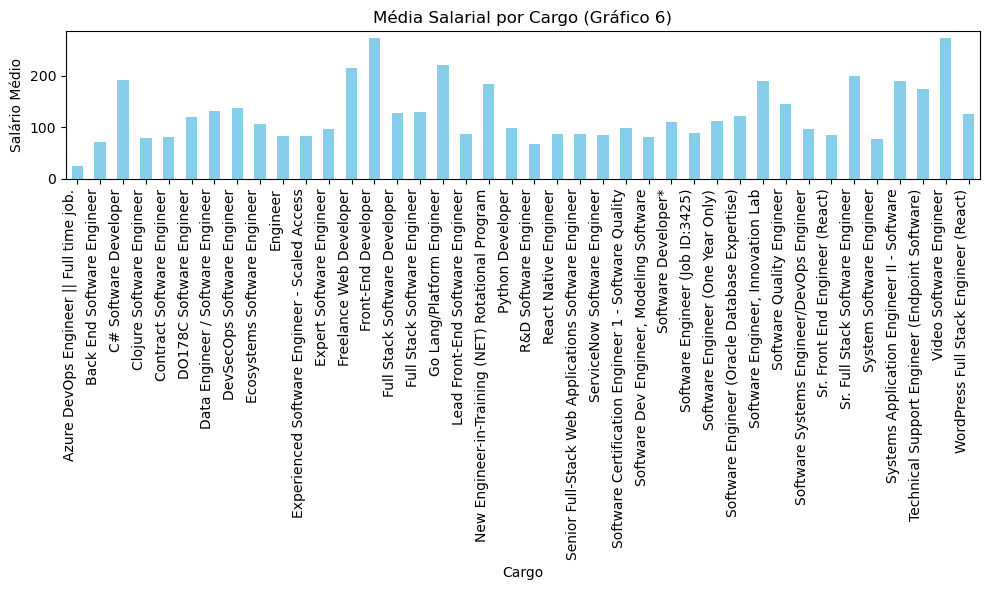

C:\Users\Giovani\AppData\Local\Temp\ipykernel_15276\2076502649.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


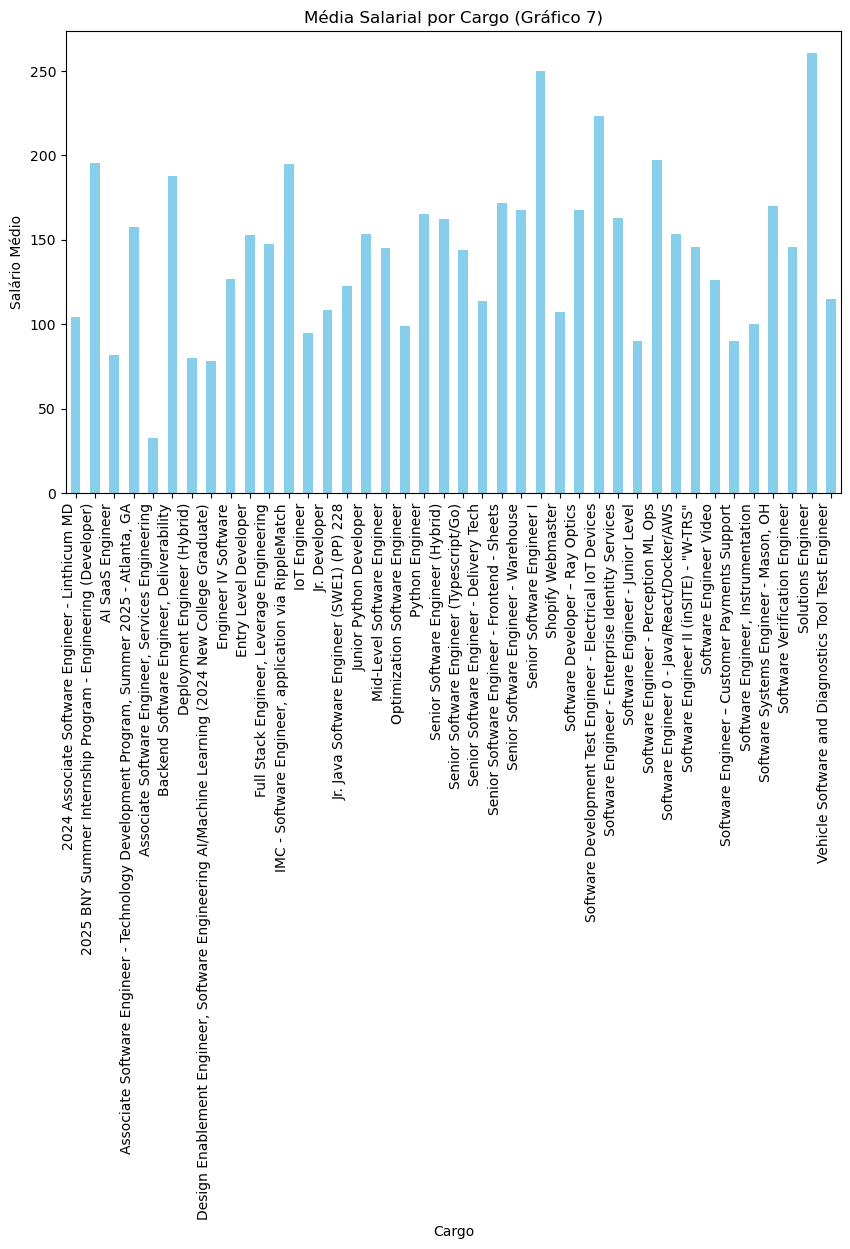

C:\Users\Giovani\AppData\Local\Temp\ipykernel_15276\2076502649.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


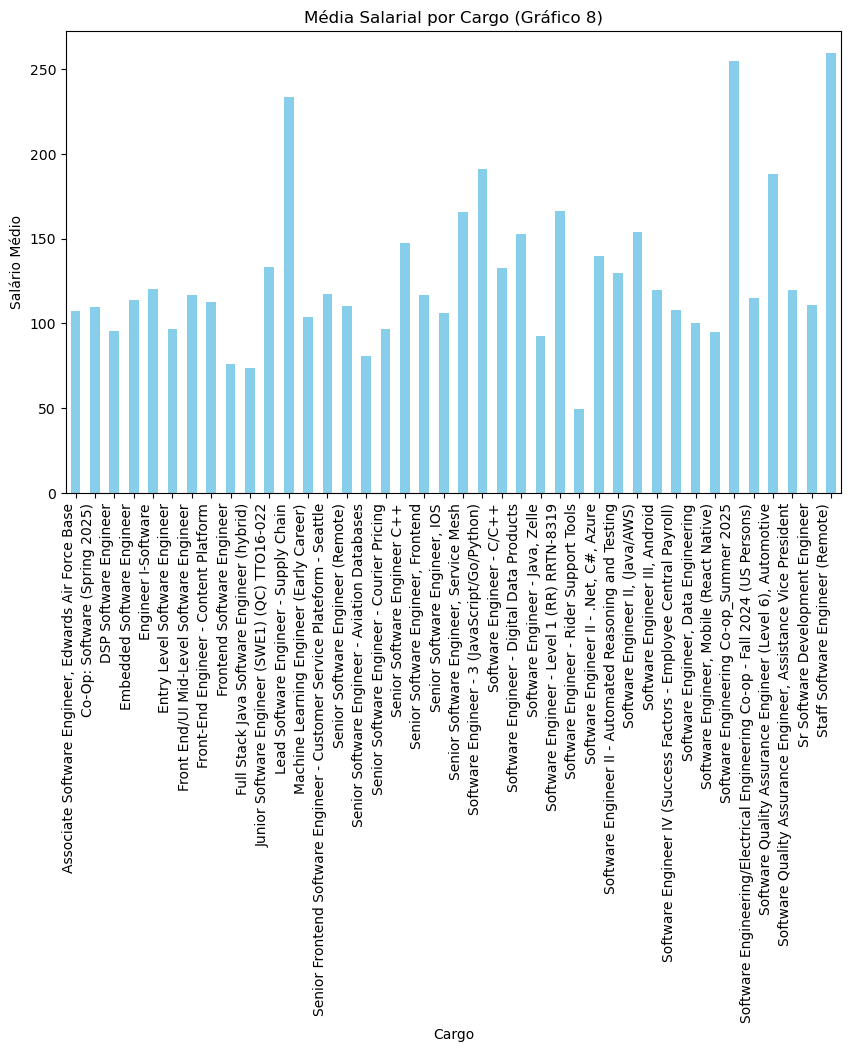

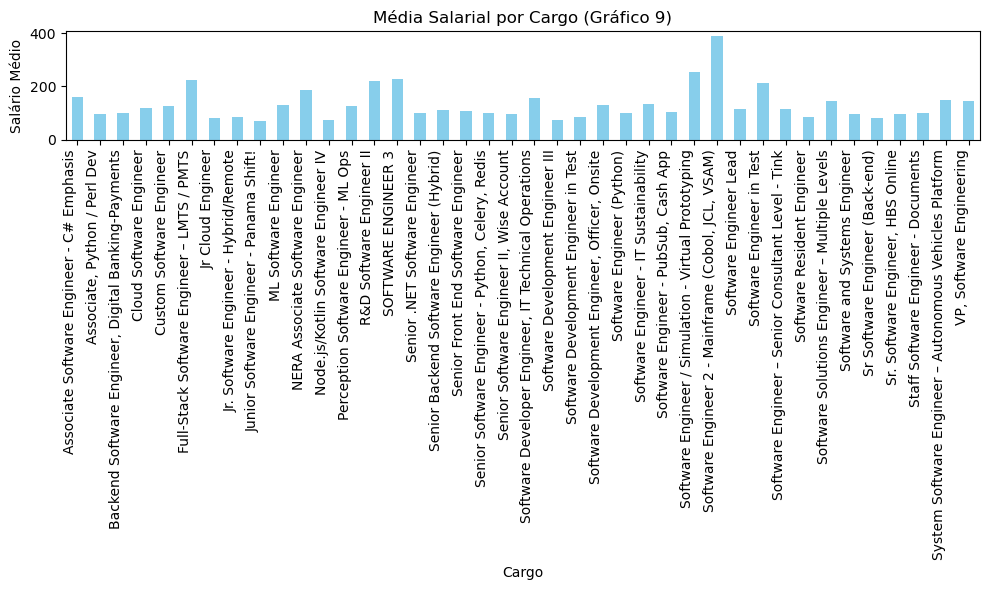

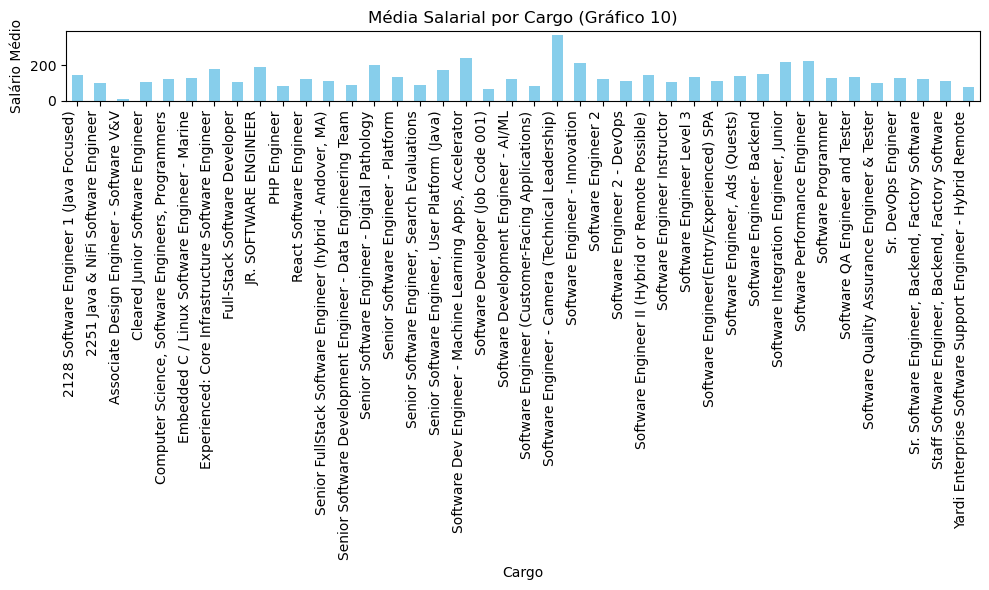

C:\Users\Giovani\AppData\Local\Temp\ipykernel_15276\2076502649.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


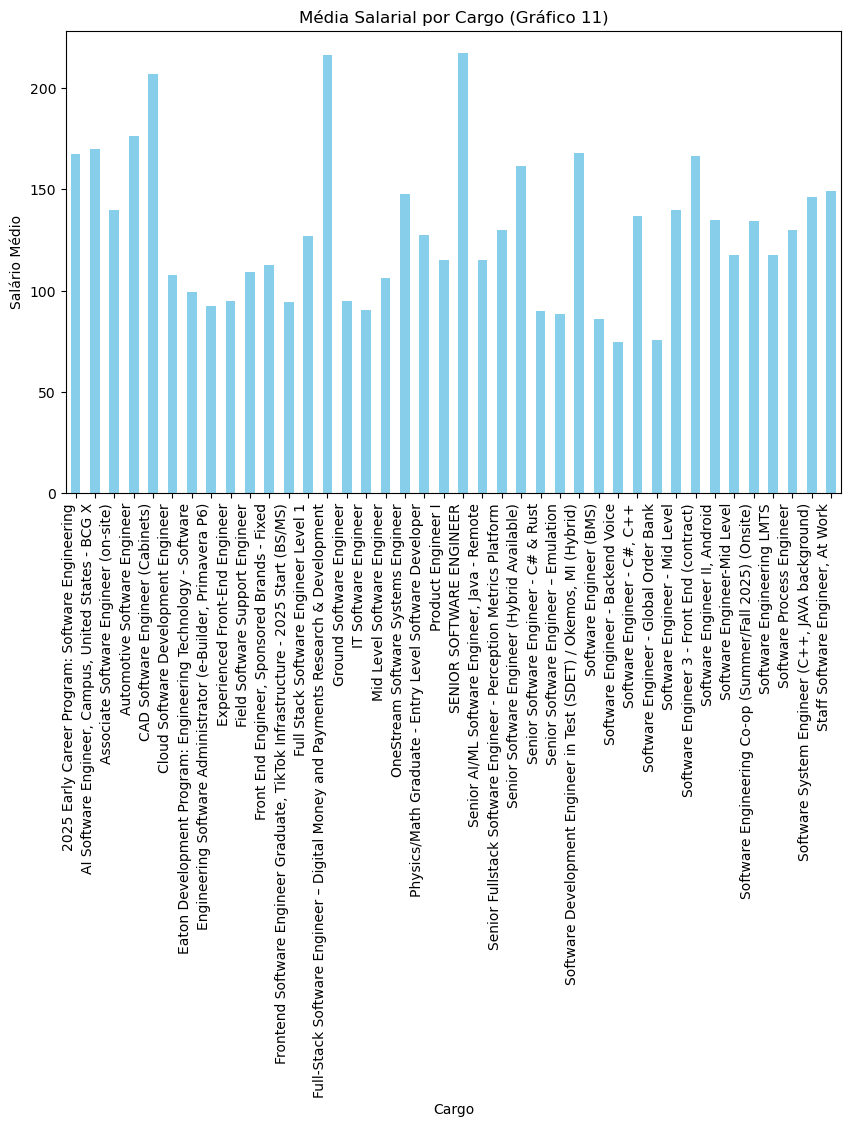

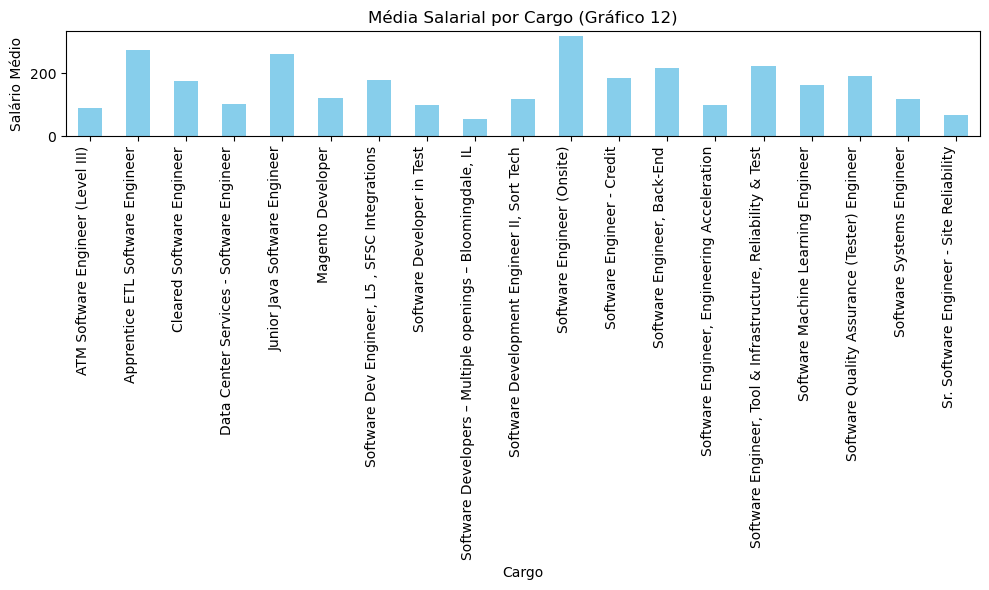

In [13]:
import math
cargos_unicos = df['Cargo'].unique()
num_cargos = len(cargos_unicos)

# Definir quantos cargos por gráfico (máximo de 10 para que o gráfico seja legível)
cargos_por_grafico = 40

# Número de gráficos necessários
num_graficos = math.ceil(num_cargos / cargos_por_grafico)

# Gerar gráficos
for i in range(num_graficos):
    start = i * cargos_por_grafico
    end = start + cargos_por_grafico
    cargos_subset = cargos_unicos[start:end]
    
    # Filtrar dados para os cargos do subset
    subset = df[df['Cargo'].isin(cargos_subset)]
    
    # Calcular média salarial por cargo
    media_salario = subset.groupby('Cargo')['Salario Limpo'].mean()
    
    # Plotar o gráfico
    plt.figure(figsize=(10, 6))
    media_salario.plot(kind='bar', color='skyblue')
    plt.title(f'Média Salarial por Cargo (Gráfico {i+1})')
    plt.ylabel('Salário Médio')
    plt.xlabel('Cargo')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    
    # Mostrar o gráfico
    plt.show()

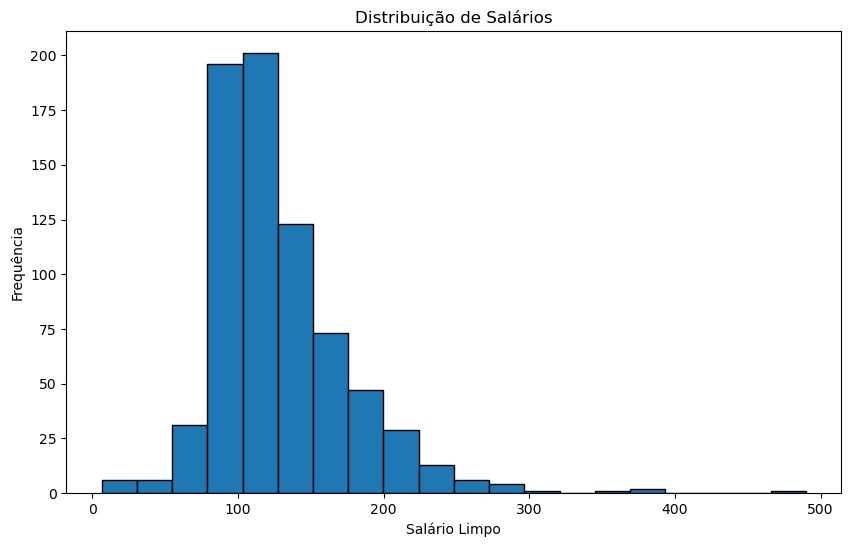

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['Salario Limpo'], bins=20, edgecolor='black')
plt.title('Distribuição de Salários')
plt.xlabel('Salário Limpo')
plt.ylabel('Frequência')
plt.show()


C:\Users\Giovani\AppData\Local\Temp\ipykernel_15276\942822111.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Faixa Salarial'] = pd.cut(df['Salario Limpo'], bins=bins, labels=labels)
C:\Users\Giovani\AppData\Local\Temp\ipykernel_15276\942822111.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Faixa Salarial')['Salario Limpo'].count().plot(kind='bar', figsize=(10,6))


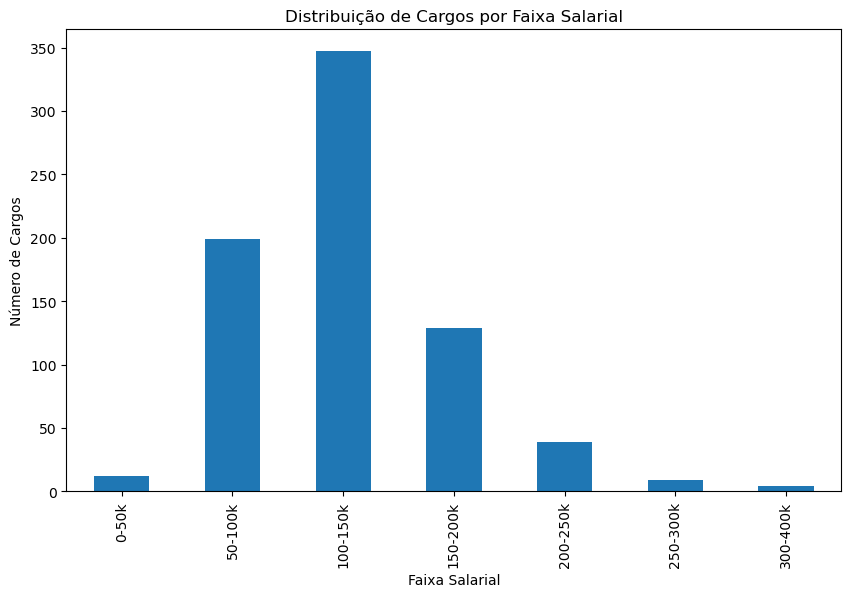

In [15]:
# Definir faixas salariais
bins = [0, 50, 100, 150, 200, 250, 300, 400]
labels = ['0-50k', '50-100k', '100-150k', '150-200k', '200-250k', '250-300k', '300-400k']

# Categorizar os cargos por faixa salarial
df['Faixa Salarial'] = pd.cut(df['Salario Limpo'], bins=bins, labels=labels)

# Visualizar
df.groupby('Faixa Salarial')['Salario Limpo'].count().plot(kind='bar', figsize=(10,6))
plt.title('Distribuição de Cargos por Faixa Salarial')
plt.ylabel('Número de Cargos')
plt.show()
